In [1]:
# Import statemets

import numpy as np                 # Math library
import matplotlib.pyplot as plt    # Plots
import pandas as pd                # Read CSV file 
from __future__ import division    # Solve problem of division in Python2
import sys                         # Directly print to output file

# Show plots in the notebook, not in the new window
%matplotlib inline


# Global parameters

Bottle_neck_size = 5*(10**5)
BCID_REF1 = 325789
BCID_REF2 = 325791
DILUTION = 9
BCID_LEN = 0

In [2]:
# Read txt file (reads)
s_Repica = '1'
s_Strain = 'DivAnc'
s_Media = 'SC3'

All_reads = [0 for i in range(0,5)]
BC_reads_REF1 = [0 for i in range(0,5)]
BC_reads_REF2 = [0 for i in range(0,5)]
BC_reads_gen0 = []
for idx_gen in range(0,5,1):
    stitle = './source/' + s_Repica + '_' + s_Strain + '_' + s_Media + '_gen' + repr(10*idx_gen) + '.txt'
    print stitle
    fopen = open(stitle,'r')
    dat = fopen.read().split()
    dat_len = int(len(dat)/3) 
    dat = np.resize(dat,(dat_len,3))
    fopen.close()
    BC_reads =[0 for i in range(1,dat_len)]
    BC_ID =[0 for i in range(1,dat_len)]
    for idx_dat in range(1,dat_len):
        BC_ID[idx_dat-1] = int(dat[idx_dat,0])
        tmp = [map(float, x) for x in dat[idx_dat,1]] 
        BC_reads[idx_dat-1] = int(dat[idx_dat,1])
    BC_ID = np.array(BC_ID)
    BC_reads = np.array(BC_reads)
    All_reads[idx_gen] = sum(BC_reads)
    itemindex = np.where(BC_ID == BCID_REF1)
    IDX_REF1 = itemindex[0][0]
    BC_reads_REF1[idx_gen] = BC_reads[IDX_REF1]
    itemindex = np.where(BC_ID == BCID_REF2)    
    IDX_REF2 = itemindex[0][0]
    BC_reads_REF2[idx_gen] = BC_reads[IDX_REF2]
    #print BC_ID[IDX_REF1]
    if idx_gen == 0:
        BC_reads_gen0 = BC_reads

#print 
#print sum(BC_reads_gen0)
print All_reads

./source/1_DivAnc_SC3_gen0.txt
./source/1_DivAnc_SC3_gen10.txt
./source/1_DivAnc_SC3_gen20.txt
./source/1_DivAnc_SC3_gen30.txt
./source/1_DivAnc_SC3_gen40.txt
[358033, 2083405, 1044948, 2098002, 1619705]


In [4]:
# Get the initail freqency

pvals = BC_reads_gen0/ float(All_reads[0])
print sum(pvals)
BCID_LEN = len(pvals)


1.0


In [16]:
# Read csv file
'''
df1 = pd.read_csv("/home/hukuo/Mytest/TnSeq/table_for_simulation.csv")
print ("Reference Barcode Index is "+repr(df1.BC_ID[IDX_REF1])+" and "+repr(df1.BC_ID[IDX_REF2])) #check
pvals = 10**(df1.Gen_0)
BCID_LEN = len(pvals)
#print pvals #check

# Check the normalization of Barcode freqeuncy

print ('Normalization of origin BC freqency dist. is {:.2f}.'.format(pvals.sum()))

if pvals.sum() >1:
    pvals /= pvals.sum()
    
print ('Re Normalize the BC freqency dist. to {:.2f}.'.format(pvals.sum()))    

print(pvals[IDX_REF1], pvals[IDX_REF2]) #check
'''

'\ndf1 = pd.read_csv("/home/hukuo/Mytest/TnSeq/table_for_simulation.csv")\nprint ("Reference Barcode Index is "+repr(df1.BC_ID[IDX_REF1])+" and "+repr(df1.BC_ID[IDX_REF2])) #check\npvals = 10**(df1.Gen_0)\nBCID_LEN = len(pvals)\n#print pvals #check\n\n# Check the normalization of Barcode freqeuncy\n\nprint (\'Normalization of origin BC freqency dist. is {:.2f}.\'.format(pvals.sum()))\n\nif pvals.sum() >1:\n    pvals /= pvals.sum()\n    \nprint (\'Re Normalize the BC freqency dist. to {:.2f}.\'.format(pvals.sum()))    \n\nprint(pvals[IDX_REF1], pvals[IDX_REF2]) #check\n'

In [5]:
# 8 Dilutions (1 st bottleneck)
# Pin the Reference strain

Pvals = []
#Pvals.extend(pvals)
tmp_pvals = pvals
for idx_dltn in range (0,DILUTION):
    sample = np.random.multinomial(Bottle_neck_size, tmp_pvals, size=1)    
    tmp_pvals = sample[0]/Bottle_neck_size
    Pvals.extend(tmp_pvals)

Pvals = np.resize(Pvals,(DILUTION,BCID_LEN))
#print Pvals
print (Pvals[0,IDX_REF1], Pvals[0,IDX_REF2]) # check
print (pvals[IDX_REF1], pvals[IDX_REF2]) # check

(7.9999999999999996e-06, 6.0000000000000002e-06)
(8.3791158915518963e-06, 5.5860772610345972e-06)


In [24]:
# 4 Reads (2nd bottleneck) and output simulated reads data

#print len(Pvals)

Output_reads = []
for idx_reads in range(0,5):
    idx_dltn = 2*idx_reads-1
    if idx_reads == 0:
        sample = BC_reads_gen0
        #print sample
    else:
        sample = np.random.multinomial(All_reads[idx_reads], Pvals[idx_dltn,0:BCID_LEN], size=1)
        sample = sample[0]
    Output_reads.extend(sample)

#print Output_ref_reads
#print len(Output_ref_reads)

Output_reads = np.resize(Output_reads,(5,BCID_LEN)) 
#print np.log(Pvals)
#print Output_reads

# Output file
stitle2 = s_Repica + '_' + s_Strain + '_' + s_Media + '_gen0.txt'
fopen = open(stitle2,'r')
dat = fopen.read().split()
dat_len = int(len(dat)/3) 
dat = np.resize(dat,(dat_len,3))
fopen.close()

orig_stdout = sys.stdout  #using system to 'print' to ouput file
stitle = s_Repica + '_' + s_Strain + '_' + s_Media + '_simulated_counts' + '.csv'
fout = open(stitle,'w')
sys.stdout = fout

#print dat
print 'STRAIN\tBC_ID\tMU_ID\tENV\tgen_0\tgen_10\tgen_20\tgen_30\tgen_40'
#'''
for idx_BCID in range(0,BCID_LEN):
        bcid = int(dat[1+idx_dat,0])
        muid = int(dat[1+idx_dat,2])
        outstring =  s_Strain+'\t'+dat[1+idx_BCID,0]+'\t'+dat[1+idx_BCID,2]+'\t'+s_Repica+'_'+s_Media
        for idx_gen in range(0,5):
            outstring += '\t'+repr(Output_reads[idx_gen,idx_BCID])
        print outstring
#'''
sys.stdout = orig_stdout
fout.close()

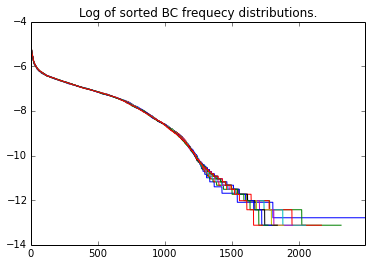

In [25]:
# Make plot for Probabiltiy distribution

x = np.arange(0,BCID_LEN)
y = np.log(sorted(pvals, reverse= True))
plt.plot(x,y)
for idx_dltn in range(0,DILUTION):
    y = np.log(sorted(Pvals[idx_dltn,0:BCID_LEN], reverse = True))
    plt.plot(x,y)
plt.xlim(0,BCID_LEN)
plt.title("Log of sorted BC frequecy distributions.")
plt.show()

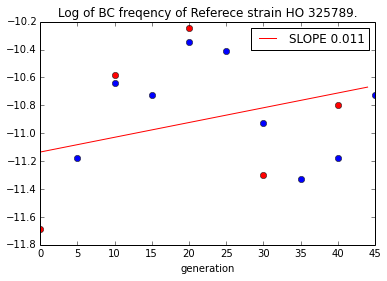

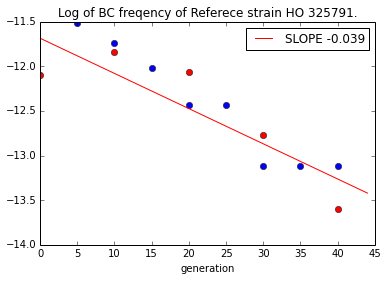

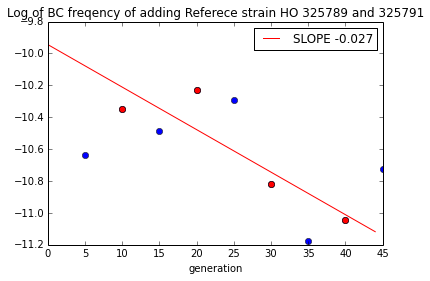

In [27]:
# Make plot for reference strain 
for idx_ref in range(0,2):
    if idx_ref == 0:
        BCID_REF = BCID_REF1
        IDX_REF = IDX_REF1
    else:
        BCID_REF = BCID_REF2
        IDX_REF = IDX_REF2
    plt.figure()
    x = np.arange(5,50,5)
    y = np.log(Pvals[0:DILUTION,IDX_REF])
    plt.plot(x,y,'bo')
    x2 = np.arange(0,50,10)
    y2 = np.log(Pvals[1:DILUTION:2,IDX_REF])
    y22 =[0 for i in range(0,5)]
    for idx_gen in range(0,5):
        y22[idx_gen] = np.log(Output_reads[idx_gen,IDX_REF]/All_reads[idx_gen])
    #y22 = np.log(Output_reads[1:5,IDX_REF]/All_reads[])
    plt.plot(x2,y22,'ro')
    z = np.polyfit(x2, y22, 1)
    fitline = np.poly1d(z)
    x3 = np.arange(0,45,1)
    y3 = fitline(x3)
    #print z
    #print y22
    plt.plot(x3,y3,'r',label='SLOPE {0:.3f}'.format(z[0]))
    plt.xlabel('generation')
    plt.legend()
    plt.title('Log of BC freqency of Referece strain HO {0:0d}.'.format(BCID_REF))
    plt.show()
plt.figure()
x = np.arange(5,50,5)
y = np.log(Pvals[0:DILUTION,IDX_REF1]+Pvals[0:DILUTION,IDX_REF2])
plt.plot(x,y,'bo')
x2 = np.arange(10,50,10)
y2 = np.log(Pvals[1:DILUTION:2,IDX_REF1]+Pvals[1:DILUTION:2,IDX_REF2])
plt.plot(x2,y2,'ro')
z = np.polyfit(x2, y2, 1)
fitline = np.poly1d(z)
S_REF = z[0]
x3 = np.arange(0,45,1)
y3 = fitline(x3)
plt.plot(x3,y3,'r',label='SLOPE {0:.3f}'.format(z[0]))
plt.xlabel('generation')
plt.legend()
plt.title('Log of BC freqency of adding Referece strain HO '+ repr(BCID_REF1)+' and '+repr(BCID_REF2))
plt.show()


[1245 1286  521 ...,  776  808  200]
[ 200  808  776 ...,  521 1286 1245]


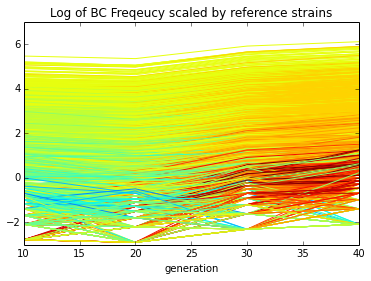

In [28]:
# Divide all Barcode freqency by the Reference BC freqency
# Barcode freqeuncy x_i ->  x_i / x_REF

rePvals = []  # rescale Pvals
for idx_dltn in range(0,DILUTION):
    rePvals.extend(Pvals[idx_dltn,0:BCID_LEN] / (Pvals[idx_dltn,IDX_REF1]+Pvals[idx_dltn,IDX_REF2]))

rePvals = np.resize(rePvals,(DILUTION,BCID_LEN))
#print(rePvals[0:DILUTION,IDX_REF]) #check
logcheck = np.sum(np.log(rePvals),axis=0)
logcheck_sort_indx = np.argsort(logcheck)
print logcheck_sort_indx
logcheck_sort_indx = logcheck_sort_indx[::-1]  # reverse
print logcheck_sort_indx
#print logcheck #check
sort_Pvals = rePvals[0:DILUTION,logcheck_sort_indx]
#print sort_Pvals #check
itemindex = np.where(sort_Pvals[DILUTION-1,0:BCID_LEN]==0)

UPBOUND = itemindex[0][0]

sort_Pvals = sort_Pvals[0:DILUTION,0:UPBOUND]
#print len(sort_Pvals)

x = np.arange(10,45,10)
s_record = [0 for i in range(0,UPBOUND)]
col = plt.cm.jet(np.linspace(0,1,20)) 
for idx_BC in range(0,UPBOUND):
    y = np.log(sort_Pvals[1:DILUTION:2,idx_BC])
    z = np.polyfit(x, y, 1)
    s_record[idx_BC] = z[0]
    cidx = int( (((0.1+z[0])>0)&((-0.1+z[0])<0))*(0.1+z[0])*100+ ((-0.1+z[0])>=0)*10)
    #print cidx
    plt.plot(x,y,color=col[cidx])

plt.title("Log of BC Freqeucy scaled by reference strains")
plt.xlabel('generation')
plt.show()

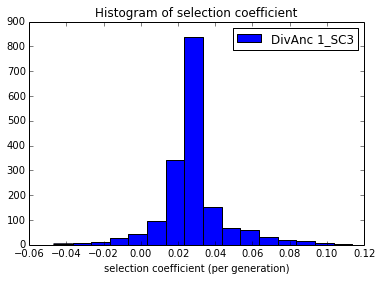

Width 0.0353
Mean 0.02819
Reference strain slope -0.02667


In [29]:
# Calculate the histogram of selection coefficient

width = 2*np.sqrt(np.var(s_record))
mean = np.mean(s_record)

sw = "Width {0:.4f}".format(width)
sm = "Mean {0:0.5f}".format(mean)
sr = "Reference strain slope {0:0.5f}".format(S_REF)

plt.hist(s_record, 16, label = 'DivAnc 1_SC3')
plt.title('Histogram of selection coefficient')
plt.xlabel('selection coefficient (per generation)')
plt.legend()
plt.show()


print (sw+'\n'+sm+'\n'+sr)